In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/qsar_aquatic_toxicity.csv', delimiter=';')
X, y = data[:,:-1], data[:,-1]

Cassotti got to cut outliers so i do too

In [3]:
from sklearn.neighbors import KDTree

In [4]:
from sklearn.neighbors import DistanceMetric

In [6]:
kd = KDTree(X)

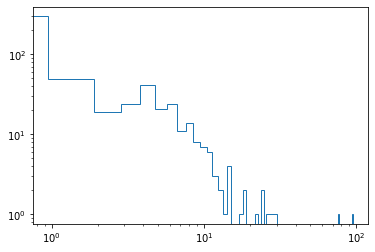

In [7]:
plt.hist([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))], bins=100, histtype='step');
plt.yscale('log')
plt.xscale('log')

In [8]:
X.shape

(546, 8)

In [9]:
X.shape

(546, 8)

In [11]:
not_too_far = np.array([True if x[0][0,1]<10 else False for x in [kd.query(X[i:i+1],2) for i in range(len(X))]])

In [13]:
np.array(sum(not_too_far) / X.shape[0]).round(3)

0.94

In [14]:
X, y = X[not_too_far], y[not_too_far]

In [15]:
from sklearn.gaussian_process.kernels import WhiteKernel, Matern
kernel = 1.**2 * Matern(length_scale=1*np.ones(X.shape[1]))\
        + 1e-3**2 * WhiteKernel(noise_level=1.)

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [17]:
from fit import fit

In [18]:
GaussianProcessRegressor.fit = fit

In [24]:
GPs = GaussianProcessRegressor(
    kernel=kernel, alpha=1e-5, optimizer='hgdl', random_state=42,).fit(
    X, y, num_individuals=50, batch_size=1, bestX=-1)

/home/elliott/anaconda3/envs/hgdlEnv/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40493 instead
  http_address["port"], self.http_server.port


{'best_x': array([ 2.30218409,  4.19594089,  5.30621726,  1.27056456,  2.58037606,
        1.59843558,  0.79249375,  1.49715656,  1.3373391 ,  3.49028005,
       -4.00996095]), 'best_y': 764.6872542007536, 'minima_x': array([[  2.30218409,   4.19594089,   5.30621726,   1.27056456,
          2.58037606,   1.59843558,   0.79249375,   1.49715656,
          1.3373391 ,   3.49028005,  -4.00996095],
       [  2.30218434,   4.1959408 ,   5.3062165 ,   1.27056448,
          2.58037614,   1.59843611,   0.79249377,   1.49715712,
          1.33733937,   2.99544896,  -3.51512984],
       [  2.46187409,   4.23137155,   5.1411619 ,   2.17852279,
          2.44506708,   1.23867891,   0.95216706,   1.70538263,
         11.50983797,  -2.75080655,   2.36462713],
       [  2.49609582,   4.29646084,   5.43080217,   1.51134768,
          2.65201166,   1.87018756,   1.05351406,   1.57738435,
         -9.66972259,   3.40082634,  -3.88576393],
       [  2.49609524,   4.29646052,   5.4308017 ,   1.51134758,
  

In [30]:
len(GPs)

33

In [31]:
likelihoods = [x.log_marginal_likelihood_value_ for x in GPs]

In [32]:
likelihoods

[-764.6872542007536,
 -764.6872542007575,
 -770.4828527278719,
 -780.1984752669516,
 -780.1984752669555,
 -783.3651141719804,
 -785.7088850048028,
 -785.7088850048053,
 -785.7088850048057,
 -785.7088850048136,
 -786.3346751094773,
 -792.8916959453436,
 -798.5292136857952,
 -802.2277261841173,
 -810.4003560527517,
 -820.5811338870416,
 -820.5811338870417,
 -822.1839654553203,
 -833.0333723509627,
 -873.9026703127702,
 -1028.8376610885673,
 -1049.2030423883882,
 -1049.2030425149424,
 -1405.2918996513313,
 -1409.2834871081782,
 -1409.2834871081932,
 -1519.0541724716484,
 -1519.3034973825263,
 -1527.0215110083898,
 -1527.0215110094884,
 -1527.0215110095944,
 -1527.0215110095944,
 -1527.0215110095944]

In [33]:
[z.score(X,y) for z in GPs]

[0.8503505179647587,
 0.8503505203580088,
 0.8176023618208185,
 0.8437435238178805,
 0.8437435257385959,
 0.8519969317764862,
 0.8569142732753814,
 0.8569142778582574,
 0.8569142767140009,
 0.8569143296788971,
 0.7759687449971847,
 0.8628860799535394,
 0.846200909649824,
 0.8362273313859254,
 0.8621320940543513,
 0.8492377606048593,
 0.8492377892912165,
 0.8443323684023393,
 0.8656668576630705,
 0.8713410745004427,
 0.9005408588362531,
 0.9200290177985335,
 0.9200290157552926,
 0.9920684219399621,
 0.9936088523955148,
 0.9936088631443768,
 0.9985278429676117,
 0.998525665926962,
 0.9985878678975157,
 0.9985878678931548,
 0.9985878679053491,
 0.998587867925558,
 0.9985878678990544]

In [35]:
with open('GPs.pkl', 'wb') as file:
    from pickle import dump
    dump(GPs, file)

In [36]:
!du -h GPs.pkl

68M	GPs.pkl
